In [1]:
# Import necessary packages
import os
import tensorflow as tf

# Import necessary files/functions
from VisualizingData.VisualizeData import init_metadata, read_metadata, visualize_metadata, \
    visualize_vectorized_features
from LoadingData.LoadData import init_vectorized_features, read_test_train, load_dataset, load_to_dataframe, \
    malicious_examples, benign_examples, single_malicious_example, single_benign_example
from Models.Generator import init_generator, generate_example
from Models.Discriminator import init_discriminator, discriminate_examples
from Models.Detector import generator_optimizer, discriminator_optimizer, generator_loss, discriminator_loss
from Training.TrainGAN import train_step, train
from GAN import GAN

Using TensorFlow backend.


In [2]:
# Declaring a variable for the path to the Ember dataset
dataset_dir = "E:/QMIND/DataSet/ember"

In [3]:
# Check that metadata.csv is in the desired directory and initialize it if not
dataset_dir_files = os.listdir(dataset_dir)
if 'metadata.csv' not in dataset_dir_files:
    init_metadata(dataset_dir)
# read the data from metadata.csv file and display the contents 
metadata = read_metadata(dataset_dir)
print(metadata)

Metadata has been read
                                                    sha256 appeared subset  \
0        0abb4fda7d5b13801d63bee53e5e256be43e141faa077a...  2006-12  train   
1        d4206650743b3d519106dea10a38a55c30467c3d9f7875...  2006-12  train   
2        c9cafff8a596ba8a80bafb4ba8ae6f2ef3329d95b85f15...  2007-01  train   
3        7f513818bcc276c531af2e641c597744da807e21cc1160...  2007-02  train   
4        ca65e1c387a4cc9e7d8a8ce12bf1bcf9f534c9032b9d95...  2007-02  train   
...                                                    ...      ...    ...   
1099995  fffe314f23cee3a68ccab272934877d3bc18ec3bd905df...  2017-12   test   
1099996  fffe7a1b23e04facc9ca91a93ac4a34e8b3040e023dbde...  2017-12   test   
1099997  fffe801f51e7ec931515aa49a3d157a9c0fbcdca8c9d80...  2017-12   test   
1099998  fffe92f9593649c4a7050302368189de45e2c1c06b04ea...  2017-12   test   
1099999  ffffb259a4c5e25ae1437af59caafb718cf8879187cc8c...  2017-12   test   

         label  
0            0  
1     

Metadata
Number of Malicious Files: 19989
Number of Benign Files: 20008
Number of Unlabeled Files: 15003

Malicious File Ratio: 0.3634363636363636
Benign File Ratio: 0.3637818181818182
Unlabeled File Ratio: 0.2727818181818182



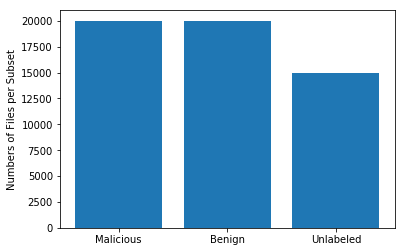

In [4]:
visualize_metadata(metadata)

In [5]:
# Loading the dataset into a dataframe for convenience
dataframe = load_to_dataframe(dataset_dir)

Vectorized training features have been read
Vectorized test features has been read
Converting X_train from np.memmap to tf.tensor
Shape of X_train tensor is (900000, 2381)
X_train conversion complete
Converting X_test from np.memmap to tf.tensor
Shape of X_test tensor is (200000, 2381)
X_test conversion complete
Loading tf.tensor data into pd.DataFrame
Training data has been loaded into pd.DataFrame
Testing data has been loaded into pd.DataFrame


In [6]:
# Declaring hyperparameters for Epoch and the floor value for Batch Size
EPOCH = 25
BATCH_SIZE_FLOOR = 391

In [7]:
# Train the models
generator, discriminator = train(EPOCH, BATCH_SIZE_FLOOR)

Vectorized training features have been read
Vectorized test features has been read
Dividing dataset into malicious and benign labeled examples
Converting data from np.memmap to tf.tensor
Epoch 1/25
Training Step 1/12
Malicious Features: [[0. 0. 0. ... 0. 0. 0.]]
Adversarial Features: [[ 1.  1. -1. ...  1.  1.  1.]]
Prediction: [[1.]]

Training Step 2/12
Malicious Features: [[0. 0. 1. ... 0. 0. 0.]]
Adversarial Features: [[ 1. -1. -1. ...  1. -1. -1.]]
Prediction: [[1.]]

Training Step 3/12
Malicious Features: [[8.5986634e-05 1.3512185e-04 1.0748329e-04 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]
Adversarial Features: [[ 1.  1.  1. ...  1. -1.  1.]]
Prediction: [[1.]]

Training Step 4/12
Malicious Features: [[0. 0. 0. ... 0. 0. 0.]]
Adversarial Features: [[ 1.  1.  1. ...  1. -1.  1.]]
Prediction: [[1.]]

Training Step 5/12
Malicious Features: [[0. 0. 0. ... 0. 0. 0.]]
Adversarial Features: [[ 1.  1. -1. ...  1.  1. -1.]]
Prediction: [[1.]]

Training Step 6/12
Malicious Features: 

In [8]:
# Load individual examples of both malicious files and benign 
mal_example = single_malicious_example(malicious_examples(dataframe))
ben_example = single_benign_example(benign_examples(dataframe))
malicious = tf.expand_dims(mal_example, 0)
benign = tf.expand_dims(ben_example, 0)

# Convert these examples from Tensor to array in order to view the data contained
malicious_data = mal_example.numpy()
benign_data = ben_example.numpy()

print(malicious_data)
print(benign_data)

[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


In [9]:
# Pass the malicious and benign examples into the discriminator to get predictions on file type
mal_prediction = discriminator.predict_on_batch([malicious])
ben_prediction = discriminator.predict_on_batch([benign])

print("Prediction on Malicious Vectorized Features: {}".format(mal_prediction))
print("Prediction on Benign Vectorized Features: {}".format(ben_prediction))

[[1.]]
[[0.]]


In [11]:
# Create a tensor of random noise to pass into the generator 
noise = tf.random.uniform([1, 2381])

# Pass the malicious file through the generator and test the output against the discriminator
adversarial_example = generator.predict_on_batch([malicious, noise])
print(adversarial_example)

[[-1.  1. -1. ...  1.  1. -1.]]


In [12]:
# Use the discriminator to make prediction on the output adversarial example
adversarial_prediction = discriminator.predict_on_batch([adversarial_example])
print(adversarial_prediction)

[[1.]]
